In [110]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


iris = load_iris()

# We only consider petal dimensions to simplify the data set
x = iris.data[:,[2,3]]

# We are only interested in classifying Setosa instances (wich are linearly separable from the others)
y = (iris.target == 0).astype(int) # Iris Setosa?

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

Visualize dataset

/tmp/ipykernel_8482/3833965955.py:12: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(


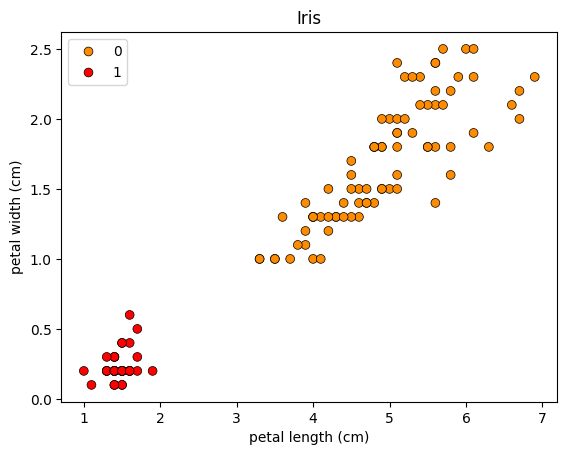

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

cmap_bold = ["darkorange", "red", "darkblue", "green", "black"]

_, ax = plt.subplots()

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

# Plot also the training points
sns.scatterplot(
    x=x_train[:, 0],
    y=x_train[:, 1],
    palette=cmap_bold,
    hue=y_train,
    s=40,
    alpha=1.0,
    edgecolor="black",
)
plt.title(
    "Iris"
)

plt.show()

In [112]:
class Perceptron:
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.bias=0

    def perceptron_calculate(self, features, weights):
        x=np.array(features)
        w=np.array(weights)
        y = np.sign(np.dot(x, w)+self.bias)
        y_pred=np.where(y > 0, 1, 0)
        return y_pred
    
    def fit(self, features, targets):
        x=np.array(features)
        t=np.array(targets)
        w=np.zeros(len(x[0]))
        for i in range(len(x)):
            y = self.perceptron_calculate(x[i], w)
            if y != t[i]:
                w = np.add(w, self.learning_rate*(t[i]-y)*x[i])
                self.bias += self.learning_rate*(t[i]-y)
        self.weights = w
    
    def predict(self, features):
        x=np.array(features)
        y = self.perceptron_calculate(x, self.weights)
        return y
    
    

In [113]:
p = Perceptron(1)
p.fit(x_train, y_train)
print(f"Weights: {p.weights}")
print(f"Bias: {p.bias}")

acc = accuracy_score(p.predict(x_train), y_train)
print(f"Training Set Accuracy: {100*acc:.2f} %")
acc = accuracy_score(p.predict(x_test), y_test)
print(f"Test Set Accuracy: {100*acc:.2f} %")

Weights: [-1.8 -2.2]
Bias: 6
Training Set Accuracy: 100.00 %
Test Set Accuracy: 100.00 %


/tmp/ipykernel_8482/455315551.py:18: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(


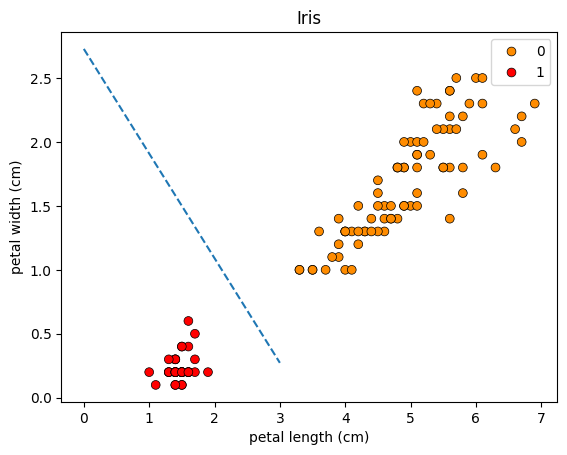

In [114]:
# line segment
w = p.weights
b = p.bias

myX = np.linspace(0, 3)
myY = -(b + w[0]*myX)/w[1]


_, ax = plt.subplots()

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

# plotting the decision boundary
plt.plot(myX, myY, '--')

# Plot also the training points
sns.scatterplot(
    x=x_train[:, 0],
    y=x_train[:, 1],
    palette=cmap_bold,
    hue=y_train,
    s=40,
    alpha=1.0,
    edgecolor="black",
)
plt.title(
    "Iris"
)

plt.show()